In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
raw_data  = pd.read_csv('Insights.csv')

In [3]:
raw_data

,Date,HS Code,Product,Specific Product,Port of Origin,Country of Destination,Port of Destination,Value(USD),Std Qty,Std Unit,Std Unit Price(USD),Qty,Unit,Value In FC,Unit Rate In FC,Unit Rate Currency,Value(INR),Shipment Mode,Invoice Value INR
0,31-Jan-20,42022110,LADIES LEATHER HAND BAG 100% COW LEATHER SAC C...,Leather,JNPT,France,Le Havre,1543.70,86.0,NOS,17.95,86.0,PCS,1543.7,17.95,USD,107981.82,Sea,0.0
1,31-Jan-20,42022110,BAG,Leather,JNPT,Japan,Kobe,3074.75,710.0,NOS,4.33,710.0,PCS,3074.3,4.33,USD,215078.96,Sea,0.0
2,28-Jan-20,42022110,COW NAPPA LEATHER HAND BAG ORDER NO.2167,Leather,JNPT,Spain,Algeciras,2487.49,100.0,NOS,24.87,100.0,PCS,2365.0,23.65,EUR,174000.00,Sea,0.0
3,28-Jan-20,42022110,COW NAPPA LEATHER HAND BAG ORDER NO.2213,Leather,JNPT,Spain,Algeciras,1529.66,100.0,NOS,15.30,100.0,PCS,1450.0,14.50,EUR,107000.00,Sea,0.0
4,28-Jan-20,42022110,COW NAPPA LEATHER HAND BAG ORDER NO.1132,Leather,JNPT,Spain,Algeciras,2558.97,70.0,NOS,36.56,70.0,PCS,2436.0,34.80,EUR,179000.00,Sea,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4968,24-Oct-19,42022220,COTTON CLUTCH BAGS(80% COTTON 10% GLASS BEAD 1...,Cotton,JNPT,Mauritius,Louis,117.00,18.0,NOS,6.50,18.0,PCS,117.0,6.50,USD,8260.21,Sea,0.0
4969,24-Oct-19,42022220,COTTON CLUTCH BAGS(80% COTTON 10% GLASS BEAD 1...,Cotton,JNPT,Mauritius,Louis,78.00,12.0,NOS,6.50,12.0,PCS,114.0,9.50,USD,5506.82,Sea,0.0
4970,24-Oct-19,42022220,COTTON TABLET BAGS(80%COTTON 10%ACCORD 1 0%GLA...,Cotton,JNPT,Mauritius,Louis,90.00,12.0,NOS,7.50,12.0,PCS,114.0,9.50,USD,6354.00,Sea,0.0
4971,24-Oct-19,42022220,100% COTTON P/L BLOCK PRINTED BAG,Cotton,JNPT,Denmark,Aarhus,8792.80,3032.0,NOS,2.90,3032.0,PCS,8792.8,2.90,USD,620771.84,Sea,0.0


In [4]:
data = raw_data.copy()
data=raw_data.drop(['Date', 'HS Code', 'Product', 'Specific Product', 'Port of Origin', 'Country of Destination', 'Port of Destination', 'Value(USD)', 'Std Qty', 'Std Unit', 'Std Unit Price(USD)', 'Unit', 'Value In FC', 'Unit Rate Currency', 'Value(INR)', 'Shipment Mode', 'Invoice Value INR'],axis=1)
# data[~data.isin([np.nan, np.inf, -np.inf]).any(1)]
# data.replace([np.inf, -np.inf], np.nan).dropna(axis=1)
data.fillna(0,inplace=True)
data

,Qty,Unit Rate In FC
0,86.0,17.95
1,710.0,4.33
2,100.0,23.65
3,100.0,14.50
4,70.0,34.80
...,...,...
4968,18.0,6.50
4969,12.0,9.50
4970,12.0,9.50
4971,3032.0,2.90


In [5]:
data.describe()

,Qty,Unit Rate In FC
count,4973.000000,4973.000000
mean,2239.850949,21.033551
std,11619.281931,89.982295
min,0.000000,0.000000
25%,52.000000,2.450000
50%,189.000000,7.250000
75%,600.000000,18.150000
max,300000.000000,2224.000000


In [6]:
y = data['Unit Rate In FC']
x1 = data['Qty']

Text(0, 0.5, 'URFC')

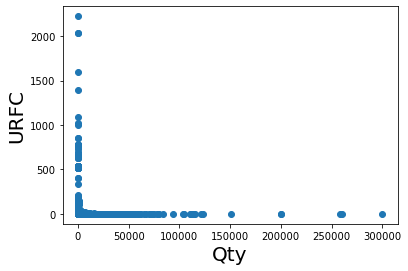

In [7]:
plt.scatter(x1,y)
plt.xlabel('Qty',fontsize=20)
plt.ylabel('URFC',fontsize= 20)

In [8]:
x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Unit Rate In FC   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     8.095
Date:                Fri, 19 Feb 2021   Prob (F-statistic):            0.00446
Time:                        19:32:54   Log-Likelihood:                -29428.
No. Observations:                4973   AIC:                         5.886e+04
Df Residuals:                    4971   BIC:                         5.887e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         21.7330      1.299     16.736      0.000      19.187      24.279
Qty           -0.0003      0.000     -2.845      0.004      -0.001   -9.71e-05
==============================================================================
Omnibus:                     9099.393   Durbin-Watson:                   1.358
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         11810765.837
Skew:                          13.542   Prob(JB):                         0.00
Kurtosis:                     240.205   Cond. No.                     1.20e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.2e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

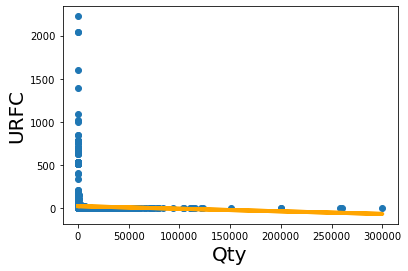

In [9]:
plt.scatter(x1,y)
yhat = -0.0003*x1+21.7330
fig = plt.plot(x1,yhat,lw=4,c='orange',label='regression line')
plt.xlabel('Qty',fontsize=20)
plt.ylabel('URFC',fontsize= 20)
plt.show()

In [10]:
#sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [11]:
x1.shape

(4973,)

In [12]:
y.shape

(4973,)

In [13]:
x1_matrix = x1.values.reshape(-1,1)
x1_matrix.shape

(4973, 1)

In [28]:
X_train,X_test,Y_train,Y_test=train_test_split(x1_matrix,y,test_size=0.2,random_state=42) 

In [29]:
X_test.shape,X_train.shape

((995, 1), (3978, 1))

In [14]:
# Regression itself()

In [31]:
reg = LinearRegression()

In [32]:
reg.fit(X_train.astype(np.float32),Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [33]:
reg.score(X_train,Y_train)

0.0017193402272789315

In [34]:
reg.coef_

array([-0.0003339], dtype=float32)

In [35]:
reg.intercept_

21.92103

In [36]:
reg.predict([[30]])

array([21.91101315])

In [38]:
reg.acc(X_test,Y_test)

AttributeError: 'LinearRegression' object has no attribute 'acc'

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

In [40]:
raw_data = pd.read_csv('Insights.csv')
raw_data.head()

,Date,HS Code,Product,Specific Product,Port of Origin,Country of Destination,Port of Destination,Value(USD),Std Qty,Std Unit,Std Unit Price(USD),Qty,Unit,Value In FC,Unit Rate In FC,Unit Rate Currency,Value(INR),Shipment Mode,Invoice Value INR
0,31-Jan-20,42022110,LADIES LEATHER HAND BAG 100% COW LEATHER SAC C...,Leather,JNPT,France,Le Havre,1543.70,86.0,NOS,17.95,86.0,PCS,1543.7,17.95,USD,107981.82,Sea,0.0
1,31-Jan-20,42022110,BAG,Leather,JNPT,Japan,Kobe,3074.75,710.0,NOS,4.33,710.0,PCS,3074.3,4.33,USD,215078.96,Sea,0.0
2,28-Jan-20,42022110,COW NAPPA LEATHER HAND BAG ORDER NO.2167,Leather,JNPT,Spain,Algeciras,2487.49,100.0,NOS,24.87,100.0,PCS,2365.0,23.65,EUR,174000.00,Sea,0.0
3,28-Jan-20,42022110,COW NAPPA LEATHER HAND BAG ORDER NO.2213,Leather,JNPT,Spain,Algeciras,1529.66,100.0,NOS,15.30,100.0,PCS,1450.0,14.50,EUR,107000.00,Sea,0.0
4,28-Jan-20,42022110,COW NAPPA LEATHER HAND BAG ORDER NO.1132,Leather,JNPT,Spain,Algeciras,2558.97,70.0,NOS,36.56,70.0,PCS,2436.0,34.80,EUR,179000.00,Sea,0.0


In [41]:
raw_data.describe(include='all')

,Date,HS Code,Product,Specific Product,Port of Origin,Country of Destination,Port of Destination,Value(USD),Std Qty,Std Unit,Std Unit Price(USD),Qty,Unit,Value In FC,Unit Rate In FC,Unit Rate Currency,Value(INR),Shipment Mode,Invoice Value INR
count,4973,4.973000e+03,4973,4973,4972,4971,4971,4971.000000,4971.000000,4971,4971.000000,4971.000000,4971,4971.000000,4971.000000,4971,4.971000e+03,4971,4971.0
unique,92,NaN,3815,6,4,16,92,NaN,NaN,5,NaN,NaN,9,NaN,NaN,9,NaN,2,NaN
top,21-Jan-20,NaN,COTTON HAND BAGS WITH/WITHOUT HANDLES :,Cotton,JNPT,France,Hamburg,NaN,NaN,NOS,NaN,NaN,PCS,NaN,NaN,USD,NaN,Sea,NaN
freq,147,NaN,34,1784,4445,793,487,NaN,NaN,4911,NaN,NaN,4620,NaN,NaN,2537,NaN,4448,NaN
mean,NaN,4.202253e+07,NaN,NaN,NaN,NaN,NaN,4716.822159,2242.921925,NaN,12.571259,2240.752116,NaN,4965.662426,21.042014,NaN,3.323365e+05,NaN,0.0
std,NaN,1.607116e+03,NaN,NaN,NaN,NaN,NaN,10478.410839,11621.412386,NaN,15.065920,11621.532685,NaN,13173.436074,89.999409,NaN,7.388925e+05,NaN,0.0
min,NaN,4.202111e+07,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,0.000000,0.000000,NaN,0.000000,0.000000,NaN,0.000000e+00,NaN,0.0
25%,NaN,4.202219e+07,NaN,NaN,NaN,NaN,NaN,421.415000,52.000000,NaN,2.380000,52.000000,NaN,475.000000,2.450000,NaN,2.969242e+04,NaN,0.0
50%,NaN,4.202222e+07,NaN,NaN,NaN,NaN,NaN,1435.560000,190.000000,NaN,7.150000,189.000000,NaN,1476.000000,7.250000,NaN,1.009449e+05,NaN,0.0
75%,NaN,4.202229e+07,NaN,NaN,NaN,NaN,NaN,4180.830000,600.000000,NaN,17.870000,600.000000,NaN,4138.750000,18.150000,NaN,2.947755e+05,NaN,0.0


In [ ]:
data = raw_data.drop()